In [2]:
import matplotlib.pyplot as plt
import numpy as np

def plot_data(data, c='c', label='', bins=100):
    plt.subplot(1, 1, 1)
    plt.hist(data,bins=bins, label='')
    plt.xticks(np.arange(0,1,0.05))
    plt.legend()
    plt.show()

stage1_entropy = '/home/ljh/GEC/gector/data/stage1.entropy.npz'

<Figure size 2000x800 with 0 Axes>

In [3]:
def convert_entropy(entro):
    SCALE_CONSTANT = 9
    CONSTANT= np.exp(-SCALE_CONSTANT)
    converted = - np.log(entro + CONSTANT) / SCALE_CONSTANT
    converted = np.where(converted > CONSTANT, converted, CONSTANT)
    sentence_entropy = np.mean(converted)
    return sentence_entropy
def get_quality(data, i):
    if 'lengths' in data:
        output = data['data'][i]
        length = data['lengths'][i]
        return output[:length]
    else:
        return data['arr_' + str(i)]

entropy_dict = dict(np.load(stage1_entropy))

In [4]:
sent_entropy = []
for i in range(len(entropy_dict['lengths'])):
    data = get_quality(entropy_dict, i)
    data = data[:50]
    data = convert_entropy(data)
    sent_entropy.append(data)

In [8]:
print(len(sent_entropy))
sample_data = sent_entropy[:100000]

2446832


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


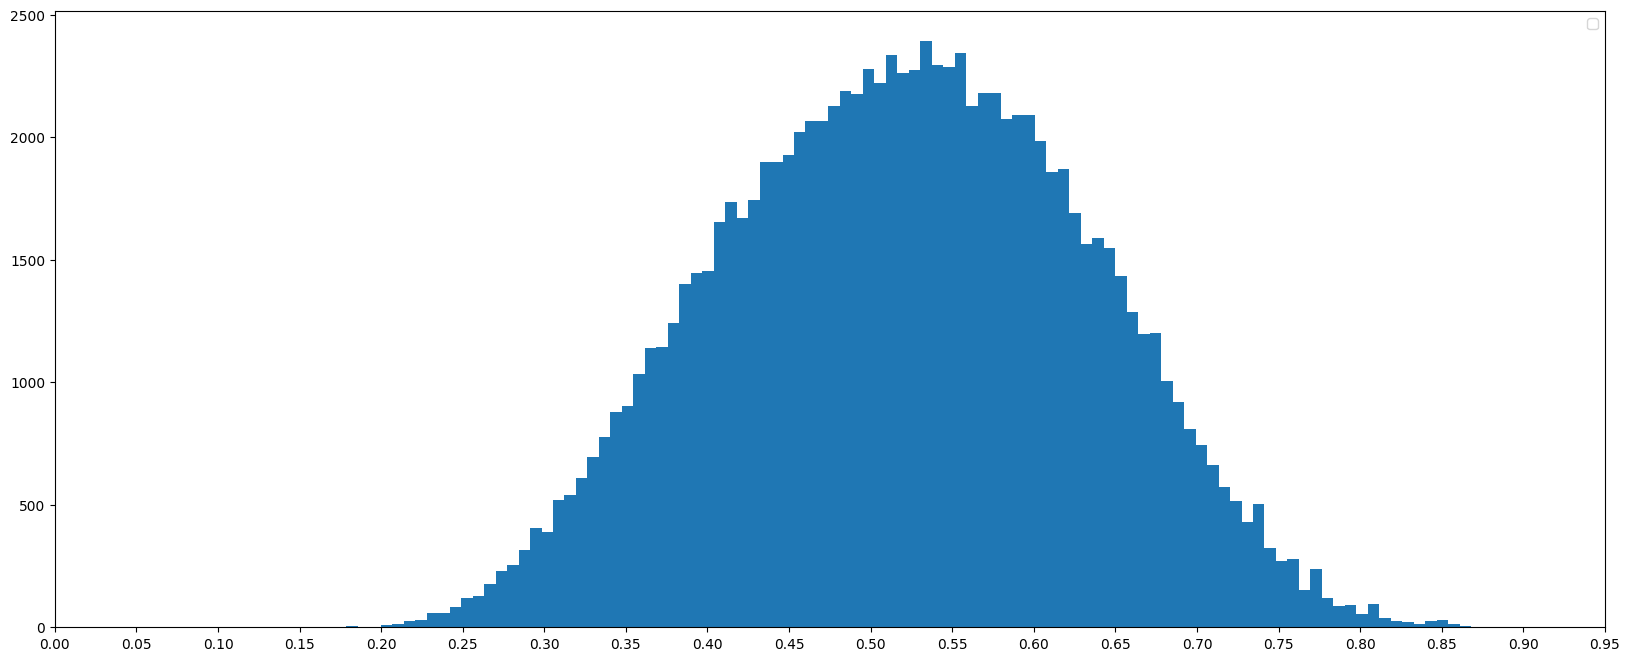

In [9]:
plt.figure(figsize=(20, 8))
plot_data(sample_data)